<a href="https://colab.research.google.com/github/herkart1011/MachineLearningTasks/blob/main/Week%202/02_Linear_Model_Financial_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [5]:
# Memuat dataset CitarumWater
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Dataset/Week 2/FinancialMarket.csv')  # Sesuaikan path file sesuai dengan lokasi dataset
# Memuat dataset FinancialMarket (Ganti path file sesuai dengan lokasi file dataset Anda)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Menampilkan beberapa baris pertama untuk melihat fitur dan target
print("Dataset FinancialMarket.csv:")
print(dataset.head())

Dataset FinancialMarket.csv:
         x  combined_data
0  0.00000       0.003073
1  0.01001       0.033492
2  0.02002      -0.027269
3  0.03003       0.176319
4  0.04004      -0.006027


In [7]:
# Memisahkan fitur (X) dan target (y)
# Misalkan kita ingin memprediksi harga saham berdasarkan fitur-fitur tertentu
# Sebagai contoh: X adalah semua kolom kecuali kolom target (misalnya 'StockPrice')
X = dataset.iloc[:, :-1].values  # Menggunakan semua kolom kecuali kolom terakhir sebagai fitur
y = dataset.iloc[:, -1].values   # Menggunakan kolom terakhir sebagai target

In [8]:
# Membagi dataset menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Membangun model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)  # Melatih model pada training set

LinearRegression()

In [10]:
# Memprediksi hasil pada test set
y_pred = model.predict(X_test)

# Menampilkan koefisien (slope) dan intercept dari model
print("Koefisien (Slope) dari model:", model.coef_)
print("Intercept dari model:", model.intercept_)

Koefisien (Slope) dari model: [-1.46635077]
Intercept dari model: 5.423812781182276


In [11]:
# Menghitung MSE dan R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Menghitung RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Menghitung Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error (MSE): 10.42
R-squared: 0.67
Root Mean Squared Error (RMSE): 3.23
Mean Absolute Error (MAE): 2.51
Mean Absolute Percentage Error (MAPE): 483.03%


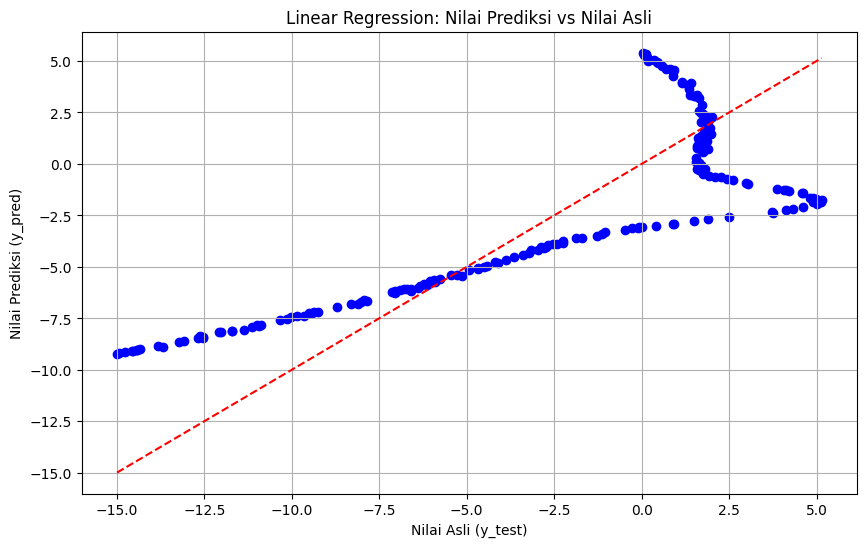

In [12]:
# Visualisasi hasil prediksi vs nilai asli
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Nilai Asli (y_test)')
plt.ylabel('Nilai Prediksi (y_pred)')
plt.title('Linear Regression: Nilai Prediksi vs Nilai Asli')
plt.grid(True)
plt.show()

## Kesimpulan
* **Nilai R² sebesar 0.67** menunjukkan bahwa model Linear Regression dapat menjelaskan sebagian besar variabilitas data target, tetapi masih ada ruang untuk perbaikan karena 33% variabilitas data tidak dapat dijelaskan oleh model.
* **Nilai MAPE sebesar 483.03%** menunjukkan bahwa model Linear Regression mungkin tidak cocok untuk dataset ini, karena kesalahan prediksi relatif terhadap nilai asli terlalu tinggi. Ini bisa terjadi jika data memiliki outlier yang signifikan atau ada hubungan non-linear antara fitur dan target yang tidak bisa dijelaskan oleh model Linear Regression.
* **Nilai MAE dan RMSE** menunjukkan bahwa kesalahan rata-rata prediksi model cukup tinggi dibandingkan dengan skala target. Ini menandakan bahwa model mungkin membutuhkan fitur tambahan, transformasi fitur, atau penggunaan model yang lebih kompleks (misalnya, model non-linear) untuk meningkatkan performa prediksi.